# Churn modelling analysis 

### Overview
We aim to create a model to determine if a customer decides to terminate his bank membership. 

Source: https://www.kaggle.com/shrutimechlearn/churn-modelling

#### Steps:
1. Data cleaning
2. Exploratory data analysis
3. Encoding categorical data
4. Splitting data into training and test set
5. Feature scaling
6. Applying logistic regression
7. Applying artificial neural networks
8. Making a single prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 1. Data cleaning

In [4]:
# Removing unnecessary rows 
to_drop = ['RowNumber','CustomerId','Surname']

In [5]:
df = df.drop(to_drop,axis=1)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Checking for any null values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 2. Exploratory data analysis

Text(0.5, 1.0, 'Credit Score')

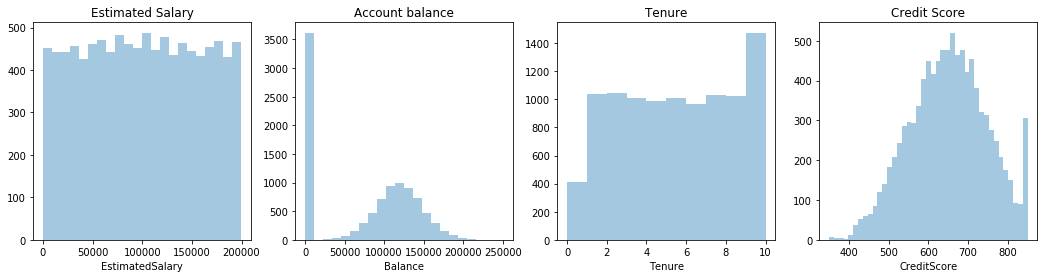

In [8]:
# Distribution plots 
plt.figure(figsize = (18,4))

plt.subplot(1,4,1)
sns.distplot(df['EstimatedSalary'], kde = False)
plt.title('Estimated Salary')

plt.subplot(1,4,2)
sns.distplot(df['Balance'], kde = False)
plt.title('Account balance')

plt.subplot(1,4,3)
sns.distplot(df['Tenure'], kde = False, bins = 10)
plt.title('Tenure')

plt.subplot(1,4,4)
sns.distplot(df['CreditScore'], kde = False)
plt.title('Credit Score')

Text(0.5, 1.0, 'Country')

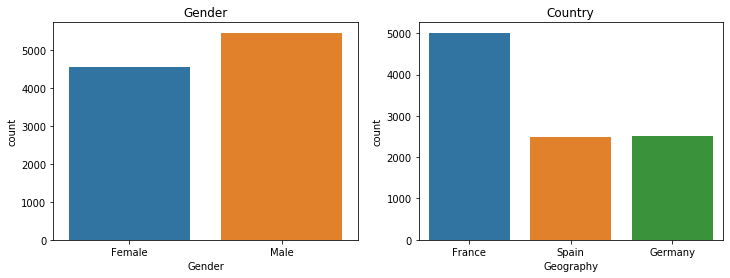

In [9]:
# Demographics
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
sns.countplot(df['Gender'])
plt.title('Gender')

plt.subplot(1,2,2)
sns.countplot(df['Geography'])
plt.title('Country')

### 3. Encoding categorical data 

In [10]:
dummies = pd.get_dummies(df[['Geography','Gender']], drop_first=True)
dummies.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [11]:
df = pd.concat([dummies, df], axis=1)

In [12]:
df.head()

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,0,1,0,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# Dropping columns that have been encoded 
df = df.drop(['Geography', 'Gender'], axis=1)

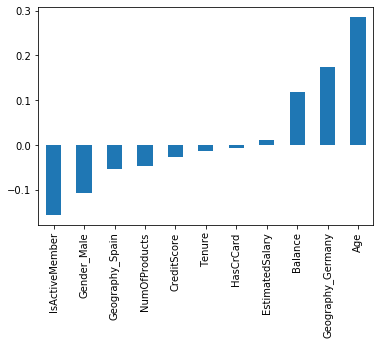

In [14]:
# Correlation graph
df.corr()['Exited'][:-1].sort_values().plot(kind='bar')

#### Top 3 factors affecting churn rate:

1. Age of the customer
2. If the customer is living in Germany
3. If the customer is an active member of the bank

### 4. Splitting into training and test set

In [15]:
X = df.drop(['Exited'],axis=1).values
y = df['Exited'].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

### 5. Feature scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train.shape

(7500, 11)

### 6. Applying logistic regression 

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
log_predictions = logmodel.predict(X_test)

In [26]:
from sklearn import metrics

In [27]:
print(metrics.classification_report(y_test,log_predictions))
print(metrics.confusion_matrix(y_test,log_predictions))
print('')
print('Accuracy: ', metrics.accuracy_score(y_test,log_predictions).round(2))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1975
           1       0.65      0.19      0.30       525

    accuracy                           0.81      2500
   macro avg       0.73      0.58      0.59      2500
weighted avg       0.78      0.81      0.77      2500

[[1919   56]
 [ 423  102]]

Accuracy:  0.81


### 7. Applying artifical neural networks

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [29]:
model = Sequential()

# Units = 11 in the first layer since we have 11 features as seen from X_train.shape
model.add(Dense(units=11,activation='relu'))

model.add(Dense(units=5,activation='relu'))

# Units = 1, activation = 'sigmoid' and loss = binary_crossentropy since we are predicting a binary outcome
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [30]:
# Early stopping to prevent overfitting 
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [31]:
model.fit(X_train,y_train,batch_size = 32,epochs=1000,validation_split = 0.2, callbacks=[early_stop])

Train on 6000 samples, validate on 1500 samples
Epoch 1/1000
6000/6000 [==============================] - 2s 378us/sample - loss: 0.6327 - accuracy: 0.6302 - val_loss: 0.4895 - val_accuracy: 0.8073
Epoch 2/1000
6000/6000 [==============================] - 1s 106us/sample - loss: 0.4853 - accuracy: 0.7962 - val_loss: 0.4597 - val_accuracy: 0.8073
Epoch 3/1000
6000/6000 [==============================] - 1s 118us/sample - loss: 0.4670 - accuracy: 0.8002 - val_loss: 0.4487 - val_accuracy: 0.8120
Epoch 4/1000
6000/6000 [==============================] - 1s 109us/sample - loss: 0.4594 - accuracy: 0.8017 - val_loss: 0.4425 - val_accuracy: 0.8120
Epoch 5/1000
6000/6000 [==============================] - 1s 106us/sample - loss: 0.4548 - accuracy: 0.8008 - val_loss: 0.4388 - val_accuracy: 0.8147
Epoch 6/1000
6000/6000 [==============================] - 1s 106us/sample - loss: 0.4509 - accuracy: 0.8005 - val_loss: 0.4317 - val_accuracy: 0.8153
Epoch 7/1000
6000/6000 [============================

Epoch 55/1000
6000/6000 [==============================] - 0s 82us/sample - loss: 0.3888 - accuracy: 0.8393 - val_loss: 0.3771 - val_accuracy: 0.8507
Epoch 56/1000
6000/6000 [==============================] - 1s 87us/sample - loss: 0.3886 - accuracy: 0.8422 - val_loss: 0.3762 - val_accuracy: 0.8520
Epoch 57/1000
6000/6000 [==============================] - 1s 90us/sample - loss: 0.3884 - accuracy: 0.8412 - val_loss: 0.3748 - val_accuracy: 0.8527
Epoch 58/1000
6000/6000 [==============================] - 1s 93us/sample - loss: 0.3866 - accuracy: 0.8427 - val_loss: 0.3750 - val_accuracy: 0.8520
Epoch 59/1000
6000/6000 [==============================] - 1s 97us/sample - loss: 0.3861 - accuracy: 0.8442 - val_loss: 0.3777 - val_accuracy: 0.8507
Epoch 60/1000
6000/6000 [==============================] - 1s 89us/sample - loss: 0.3865 - accuracy: 0.8423 - val_loss: 0.3736 - val_accuracy: 0.8520
Epoch 61/1000
6000/6000 [==============================] - 1s 88us/sample - loss: 0.3844 - accuracy:

6000/6000 [==============================] - 1s 90us/sample - loss: 0.3493 - accuracy: 0.8582 - val_loss: 0.3399 - val_accuracy: 0.8627
Epoch 110/1000
6000/6000 [==============================] - 1s 98us/sample - loss: 0.3505 - accuracy: 0.8563 - val_loss: 0.3380 - val_accuracy: 0.8587
Epoch 111/1000
6000/6000 [==============================] - 0s 83us/sample - loss: 0.3504 - accuracy: 0.8550 - val_loss: 0.3369 - val_accuracy: 0.8593
Epoch 112/1000
6000/6000 [==============================] - 1s 89us/sample - loss: 0.3504 - accuracy: 0.8572 - val_loss: 0.3380 - val_accuracy: 0.8607
Epoch 113/1000
6000/6000 [==============================] - 0s 82us/sample - loss: 0.3498 - accuracy: 0.8577 - val_loss: 0.3363 - val_accuracy: 0.8607
Epoch 114/1000
6000/6000 [==============================] - 1s 98us/sample - loss: 0.3498 - accuracy: 0.8560 - val_loss: 0.3403 - val_accuracy: 0.8560
Epoch 115/1000
6000/6000 [==============================] - 1s 101us/sample - loss: 0.3499 - accuracy: 0.8568

In [32]:
losses = pd.DataFrame(model.history.history)

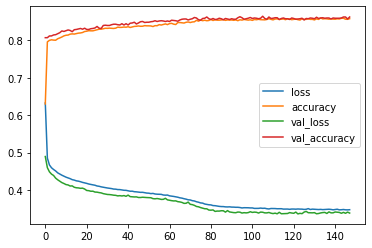

In [33]:
losses.plot()

In [34]:
predictions = model.predict_classes(X_test)

In [35]:
print(metrics.classification_report(y_test,predictions))
print(metrics.confusion_matrix(y_test,predictions))
print('')
print('Accuracy:', metrics.accuracy_score(y_test,predictions).round(2))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1975
           1       0.74      0.49      0.59       525

    accuracy                           0.86      2500
   macro avg       0.81      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500

[[1883   92]
 [ 266  259]]

Accuracy: 0.86


Artificial neural networks performed better than logistic regression by 5%. 

### 8. Making a single prediction

In [36]:
from random import randint

In [37]:
rand_int = randint(0,len(df))

In [38]:
random_customer = df.iloc[rand_int]

In [39]:
random_customer

Geography_Germany         0.00
Geography_Spain           0.00
Gender_Male               1.00
CreditScore             665.00
Age                      33.00
Tenure                    2.00
Balance              101286.11
NumOfProducts             1.00
HasCrCard                 1.00
IsActiveMember            1.00
EstimatedSalary      159840.51
Exited                    0.00
Name: 2147, dtype: float64

As an example, we will use our deep learning model to predict if a 33 year old male customer from france has exited the bank. 

In [40]:
random_customer = random_customer[:-1].values.reshape(1,11)

In [41]:
label = ['Stayed','Exited']

In [42]:
print('Predicted: ',label[int(model.predict_classes(random_customer))])
print('Actual:    ',label[df['Exited'][rand_int]])

Predicted:  Stayed
Actual:     Stayed
